## Dataset Information

The data scientists have collected data of 19158 applicants who apllied for a particular job in a company. Also, certain attributes of each candidate been defined. The aim is to build a predictive model and find out whether the candidate get selected or not.

Using this model, We will try to understand the properties which play a key role in achiving target by employee.


Variable | Description
----------|--------------
enrollee_id | Unique Enrollment ID of each candidate
city |  city of each candidate
city_development_index | How developed is the city
Gender | Gender of candidate
relevent_experience | Candidate having relevent experience related to particular job role
enrolled_university | Currently enrolled university
education_level | Education level of candidate
major_discipline | Major discipline of candidate
experience | Candidate having  how much experience of any job
company_size | The size of company in which the candidate is working
company_type | The type of company in which the candidate is working
last_new_job | How many previous jobs candidate had done
training_hours | How many hours candidates had done training for that particular work.
target | candidate selected or not

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder

In [18]:
df = pd.read_csv('aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
#checking for missing values
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
# checking the parameters of numerical columns
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [3]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

enrollee_id               19158
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
target                        2
dtype: int64

## Visualising our different columns of data through the graph

we visualise the different coloumns to know the distribution of data from that we can do various things like 
* standardization
* filling missing value
* handling categorical data
* outlier detection

In [7]:
df.city.unique().size
# here city have 123 unique value which will generate extra features unnecessarily 
# so we can use only city development index instead of city

123

C:\Users\araku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'city_development_index QQ Plot')

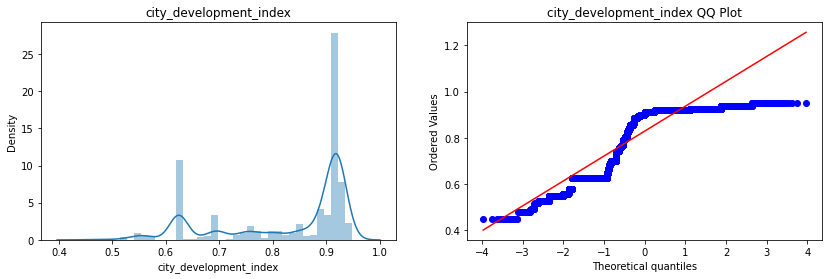

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['city_development_index'])
plt.title('city_development_index')
plt.subplot(122)
stats.probplot(df['city_development_index'], dist="norm", plot=plt)
plt.title('city_development_index QQ Plot')

# Hence data not normally distributed we use mathematical transformation if required

C:\Users\araku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_development_index'>

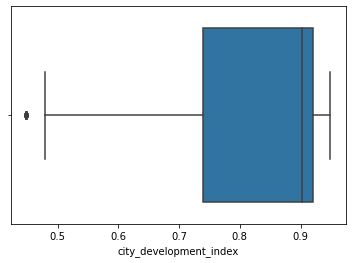

In [9]:
sns.boxplot(df['city_development_index'])
# there is also some outlier we need to care

C:\Users\araku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

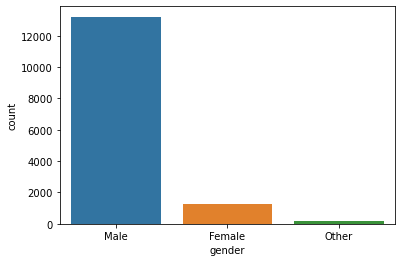

In [10]:
sns.countplot(df['gender'])
# we know missing data in gender and we can fill by mod because mode is drastically greater

C:\Users\araku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

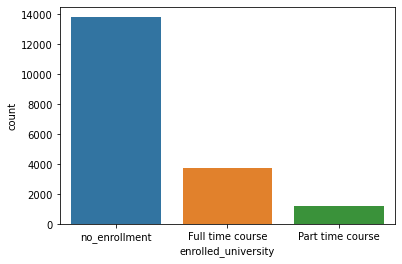

In [11]:
sns.countplot(df['enrolled_university'])

<AxesSubplot:ylabel='relevent_experience'>

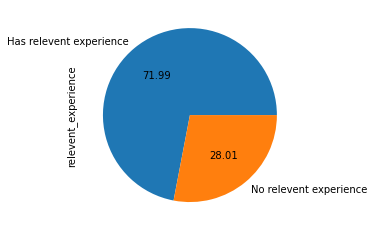

In [12]:
df['relevent_experience'].value_counts().plot(kind='pie',autopct='%.2f')
# for this column we simply use ordinal encoding

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

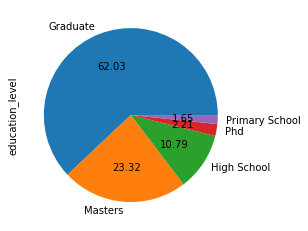

In [13]:
df['education_level'].value_counts().plot(kind='pie',autopct='%.2f')
df['education_level'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

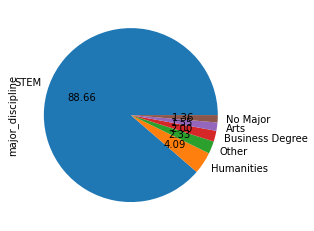

In [103]:
df['major_discipline'].value_counts().plot(kind='pie',autopct='%.2f')
df['major_discipline'].value_counts()
# here also we can use mod to fill missing value

C:\Users\araku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='count'>

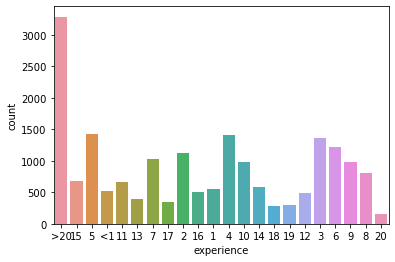

In [15]:
sns.countplot(df['experience'])
# the pandas is considering it categorical we simply convert into numerical with label encoding

In [17]:
df['company_type'].value_counts()
# here we have to use oneshot encoding
# both company size and company type will inter related so we can try multivariate imputer to fill them

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

<AxesSubplot:ylabel='last_new_job'>

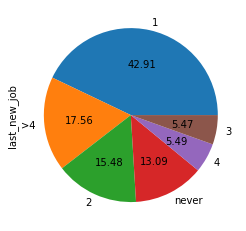

In [18]:
df['last_new_job'].value_counts().plot(kind='pie',autopct='%.2f')
# we simply change never to zero 
# # for filling missing value we check distribution of last_new_job column and also for transformation when it is converted into numerical form

C:\Users\araku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'training_hours QQ Plot')

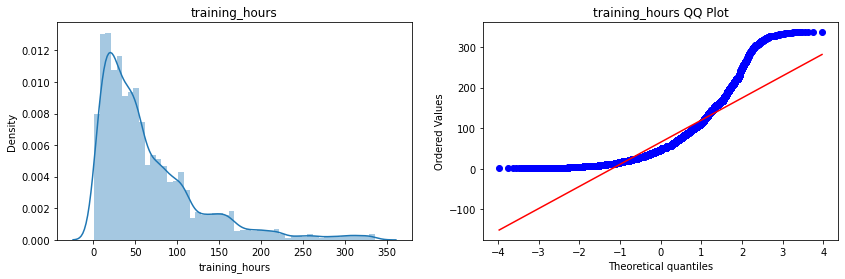

In [19]:
# we check distribution of training_hours column and also for transformation
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['training_hours'])
plt.title('training_hours')
plt.subplot(122)
stats.probplot(df['training_hours'], dist="norm", plot=plt)
plt.title('training_hours QQ Plot')
# since data is right skewed we use log transform if required

C:\Users\araku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='training_hours'>

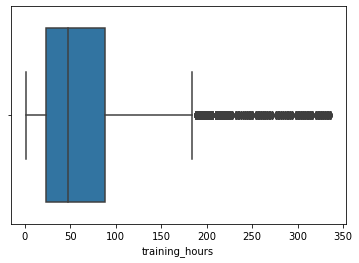

In [20]:
sns.boxplot(df['training_hours'])
# as you can see here is a lot of outliers so we use robust scaling in this column

<AxesSubplot:ylabel='target'>

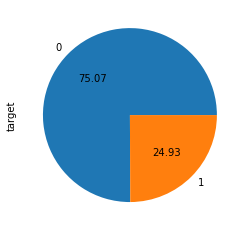

In [17]:
df['target'].value_counts().plot(kind='pie',autopct='%.2f')

now we got a rough idea of every column 
Now first we remove those column who dont impact the result 
* enrollee_id - because clearly id can't impact result
* city - because we have already city development index of each city

As we know that gender column have many null values so we have two ways
 * first try to create a model without gender column if it will not work then we try to find other ways 
 * remove 1/4 of the data which contain null values
 
So we must proceed with first option rather than excluding 1/4 of the data we remove one column

In [20]:
df=df.drop(['enrollee_id','city','gender'],axis=1)
df
#df=df.drop(['gender'],axis=1)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,0.802,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## Now we try to convert experience and last_new_job column to numerical data rather than categorical

In [21]:
df.to_csv('trim_data.csv',index=False)
df=df.loc[:,~df.columns.str.match("Unnamed")]

In [22]:
def rename(name):
    if name == ">4":
        return "5"
    elif name == "never":
        return "0"
    else:
        return name
#df=pd.read_csv('aug_train.csv',converters={'last_new_job':rename})

In [23]:
def rename2(name):
    if name == ">20":
        return "21"
    elif name == "<1":
        return "0"
    else:
        return name

In [24]:
df=pd.read_csv('trim_data.csv',converters={'last_new_job':rename,'experience':rename2})
df=df.loc[:,~df.columns.str.match("Unnamed")]
df

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0.0
19156,0.802,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2,97,0.0


In [25]:
df['last_new_job']=pd.to_numeric(df['last_new_job'], errors='coerce').convert_dtypes() 

In [26]:
df['experience']=pd.to_numeric(df['experience'], errors='coerce').convert_dtypes()

In [27]:
df['target']=pd.to_numeric(df['target'], errors='coerce').convert_dtypes()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  object 
 2   enrolled_university     18772 non-null  object 
 3   education_level         18698 non-null  object 
 4   major_discipline        16345 non-null  object 
 5   experience              19093 non-null  Int64  
 6   company_size            13220 non-null  object 
 7   company_type            13018 non-null  object 
 8   last_new_job            18735 non-null  Int64  
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  Int64  
dtypes: Int64(3), float64(1), int64(1), object(6)
memory usage: 1.7+ MB


## Handling Missing Data

In [29]:
df.isnull().sum()

city_development_index       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

First we see company_size and company_type column both have large amount of missing value

There are two cases of empty rows in company_size and company_type
* It is possible that some candidate who are not working currently in any company so there company feild will be blank
* The second case will be it is left blank by mistake

So we can handle case 1 problem if the both company feild is blank then candidate is not working in any company

In [30]:
df['company_type']=np.where(df['company_size'].isnull() & df['company_type'].isnull(), "0", df['company_type'])
df['company_size']=np.where(df['company_type']=="0", "0", df['company_size'])
df

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,0,0,1,36,1
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,0,0,0,83,0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,0,0,1,42,1
19154,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,0,0,4,52,1
19155,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0
19156,0.802,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2,97,0


Now we try to fill major_discipline 
* first we find where the major_discipline is null

In [31]:
df[df['major_discipline'].isna()]

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6,0.920,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0
10,0.624,No relevent experience,Full time course,High School,NaN,2,0,0,0,32,1
13,0.624,No relevent experience,NaN,NaN,NaN,2,0,0,0,24,0
14,0.624,No relevent experience,Full time course,High School,NaN,5,0,0,0,26,0
25,0.855,No relevent experience,no_enrollment,High School,NaN,4,0,0,0,22,0
...,...,...,...,...,...,...,...,...,...,...,...
19140,0.920,No relevent experience,no_enrollment,Primary School,NaN,2,0,0,0,15,0
19142,0.776,Has relevent experience,no_enrollment,NaN,NaN,5,10/49,Early Stage Startup,1,26,0
19151,0.689,No relevent experience,Full time course,Graduate,NaN,2,0,0,1,60,0
19156,0.802,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2,97,0


we can obviously know if someone have education_level higher or primary then they dont have any major_discipline

which can be easily verified by the below data of where major_discipline is null

In [32]:
df[df['major_discipline'].isna()]['education_level'].value_counts()

High School       2017
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

So now we fill every missing value of major_discipline by No major where education_level is Primary School or High School

In [33]:
df['major_discipline']=np.where(df['education_level']=="High School","No Major",df['major_discipline'])
df['major_discipline']=np.where(df['education_level']=="Primary School","No Major",df['major_discipline'])
df

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,0,0,1,36,1
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,0,0,0,83,0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,0,0,1,42,1
19154,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,0,0,4,52,1
19155,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0
19156,0.802,Has relevent experience,no_enrollment,High School,No Major,0,500-999,Pvt Ltd,2,97,0


In [34]:
df.dropna(inplace=True)
df

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,0,0,1,36,1
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,0,0,0,83,0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0
5,0.764,Has relevent experience,Part time course,Graduate,STEM,11,0,0,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,0,0,1,42,1
19154,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,0,0,4,52,1
19155,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0
19156,0.802,Has relevent experience,no_enrollment,High School,No Major,0,500-999,Pvt Ltd,2,97,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16782 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  16782 non-null  float64
 1   relevent_experience     16782 non-null  object 
 2   enrolled_university     16782 non-null  object 
 3   education_level         16782 non-null  object 
 4   major_discipline        16782 non-null  object 
 5   experience              16782 non-null  Int64  
 6   company_size            16782 non-null  object 
 7   company_type            16782 non-null  object 
 8   last_new_job            16782 non-null  Int64  
 9   training_hours          16782 non-null  int64  
 10  target                  16782 non-null  Int64  
dtypes: Int64(3), float64(1), int64(1), object(6)
memory usage: 1.6+ MB


In [36]:
df['company_size'].value_counts()
#here also ordinal encoding

0            4781
50-99        2742
100-500      2352
10000+       1892
10/49        1303
1000-4999    1225
<10          1184
500-999       791
5000-9999     512
Name: company_size, dtype: int64

In [37]:
def rename_company_size(name):
    if name == "<10":
        return "5"
    elif name == "10/49":
        return "25"
    elif name == "50-99":
        return "75"
    elif name == "100-500":
        return "250"
    elif name == "500-999":
        return "750"
    elif name== "1000-4999":
        return "2500"
    elif name== "5000-9999":
        return "7500"
    elif name== "10000+":
        return "10000"
    else:
        return name

In [38]:
df.to_csv('pre_processed_data.csv',index=False)
df=df.loc[:,~df.columns.str.match("Unnamed")]

In [39]:
df=pd.read_csv('pre_processed_data.csv',converters={'company_size':rename_company_size})

In [77]:
df['major_discipline'].value_counts()

STEM               13086
No Major            2190
Humanities           619
Other                345
Business Degree      317
Arts                 225
Name: major_discipline, dtype: int64

In [40]:
df

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,0,0,1,36,1
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,75,Pvt Ltd,5,47,0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,0,0,0,83,0
3,0.767,Has relevent experience,no_enrollment,Masters,STEM,21,75,Funded Startup,4,8,0
4,0.764,Has relevent experience,Part time course,Graduate,STEM,11,0,0,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...
16777,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,0,0,1,42,1
16778,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,0,0,4,52,1
16779,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,75,Pvt Ltd,4,44,0
16780,0.802,Has relevent experience,no_enrollment,High School,No Major,0,750,Pvt Ltd,2,97,0


In [41]:
oe = OrdinalEncoder(categories=[['No relevent experience','Has relevent experience'],['no_enrollment','Part time course','Full time course']])

In [42]:
df[['relevent_experience','enrolled_university']]=oe.fit_transform(df[['relevent_experience','enrolled_university']])

In [43]:
encoder = OrdinalEncoder(categories=[['Primary School', 'High School', 'Graduate','Masters','Phd']])
df[['education_level']]=encoder.fit_transform(df[['education_level']])

In [44]:
encoder2 = OrdinalEncoder(categories=[['0', 'Pvt Ltd', 'Funded Startup','Public Sector','Early Stage Startup','NGO','Other']])
df[['company_type']]=encoder2.fit_transform(df[['company_type']])

In [78]:
encoder3 = OrdinalEncoder(categories=[['Humanities','Business Degree','Arts','Other','STEM','No Major']])
df[['major_discipline']]=encoder3.fit_transform(df[['major_discipline']])

In [79]:
df

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.0,0.0,2.0,4.0,21,0,0.0,1,36,1
1,0.776,0.0,0.0,2.0,4.0,15,75,1.0,5,47,0
2,0.624,0.0,2.0,2.0,4.0,5,0,0.0,0,83,0
3,0.767,1.0,0.0,3.0,4.0,21,75,2.0,4,8,0
4,0.764,1.0,1.0,2.0,4.0,11,0,0.0,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...
16777,0.878,0.0,0.0,2.0,0.0,14,0,0.0,1,42,1
16778,0.920,1.0,0.0,2.0,4.0,14,0,0.0,4,52,1
16779,0.920,1.0,0.0,2.0,4.0,21,75,1.0,4,44,0
16780,0.802,1.0,0.0,1.0,5.0,0,750,1.0,2,97,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  16782 non-null  float64
 1   relevent_experience     16782 non-null  float64
 2   enrolled_university     16782 non-null  float64
 3   education_level         16782 non-null  float64
 4   major_discipline        16782 non-null  float64
 5   experience              16782 non-null  int64  
 6   company_size            16782 non-null  object 
 7   company_type            16782 non-null  float64
 8   last_new_job            16782 non-null  int64  
 9   training_hours          16782 non-null  int64  
 10  target                  16782 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 1.4+ MB


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [82]:
y_train

16243    0
10640    1
14018    1
13254    0
7005     0
        ..
14696    0
1099     1
11798    0
6637     0
2575     0
Name: target, Length: 13425, dtype: int64

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of the KNeighborsClassifier class
Kclassifier = KNeighborsClassifier()

# Fit the model to the training data
Kclassifier.fit(X, y)

# Predict the target values for the test data
y_pred = Kclassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.7307349003272835
Confusion Matrix:
[[2426   98]
 [ 807   30]]


C:\Users\araku\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [96]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [112]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

print("Original class distribution:")
print(y.value_counts())

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# check the class distribution after oversampling
print("Class distribution after random oversampling:")
print(pd.Series(y_resampled).value_counts())
classifier1 = DecisionTreeClassifier()

# Fit the model to the training data
classifier1.fit(X_resampled, y_resampled)

# Predict the target values for the test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)
print(" ")

# balance the data using random undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# check the class distribution after undersampling
print("Class distribution after random undersampling:")
print(pd.Series(y_resampled).value_counts())

classifier = DecisionTreeClassifier()

# Fit the model to the training data
classifier.fit(X_resampled, y_resampled)

# Predict the target values for the test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)
print(" ")

# balance the data using SMOTE and ENN
sme = SMOTEENN(random_state=0)
X_resampled, y_resampled = sme.fit_resample(X_train, y_train)



# check the class distribution after SMOTE and ENN
print("Class distribution after SMOTE and ENN:")
print(pd.Series(y_resampled).value_counts())

classifier = DecisionTreeClassifier()

# Fit the model to the training data
classifier.fit(X_resampled, y_resampled)

# Predict the target values for the test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)
print(" ")

Original class distribution:
0    12630
1     4152
Name: target, dtype: int64
Class distribution after random oversampling:
0    10065
1    10065
Name: target, dtype: int64
Accuracy: 0.7164134644027406
Confusion Matrix:
[[1885  680]
 [ 272  520]]
 
Class distribution after random undersampling:
0    3360
1    3360
Name: target, dtype: int64
Accuracy: 0.6568364611260054
Confusion Matrix:
[[1679  886]
 [ 266  526]]
 
Class distribution after SMOTE and ENN:
1    6496
0    4313
Name: target, dtype: int64
Accuracy: 0.7164134644027406
Confusion Matrix:
[[1885  680]
 [ 272  520]]
 


In [91]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

print("Original class distribution:")
print(y.value_counts())

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# check the class distribution after oversampling
print("Class distribution after random oversampling:")
print(pd.Series(y_resampled).value_counts())
classifier = DecisionTreeClassifier()

# Fit the model to the training data
classifier.fit(X_train,y_train)

# Predict the target values for the test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)
print(" ")

# balance the data using random undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# check the class distribution after undersampling
print("Class distribution after random undersampling:")
print(pd.Series(y_resampled).value_counts())

classifier = DecisionTreeClassifier()

# Fit the model to the training data
classifier.fit(X_train,y_train)

# Predict the target values for the test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)
print(" ")

# balance the data using SMOTE and ENN
sme = SMOTEENN(random_state=0)
X_resampled, y_resampled = sme.fit_resample(X_train, y_train)



# check the class distribution after SMOTE and ENN
print("Class distribution after SMOTE and ENN:")
print(pd.Series(y_resampled).value_counts())

classifier = DecisionTreeClassifier()

# Fit the model to the training data
classifier.fit(X_resampled, y_resampled)

# Predict the target values for the test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print results
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)
print(" ")

Original class distribution:
0    12630
1     4152
Name: target, dtype: int64
Class distribution after random oversampling:
0    10065
1    10065
Name: target, dtype: int64
Accuracy: 0.7250521298778672
Confusion Matrix:
[[2071  494]
 [ 429  363]]
 
Class distribution after random undersampling:
0    3360
1    3360
Name: target, dtype: int64
Accuracy: 0.7235627047959488
Confusion Matrix:
[[2069  496]
 [ 432  360]]
 
Class distribution after SMOTE and ENN:
1    6496
0    4313
Name: target, dtype: int64
Accuracy: 0.7080726839439976
Confusion Matrix:
[[1868  697]
 [ 283  509]]
 


In [95]:
X_train.shape

(13425, 10)

In [114]:
predictions = classifier1.predict([[0.720,1.0,1.0,2.0,4.0,21,0,0.0,1,36]])

# 3. Interpret the results
# Example: Print the predicted class or value
print("Predicted class:", predictions)

Predicted class: [1]


C:\Users\araku\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [116]:
import pickle

In [117]:
pickle.dump(classifier1, open('model.pkl','wb'))

In [120]:
print(model.predict([[0.920,1.0,1.0,2.0,4.0,21,0,0.0,1,36]]))

[0]


C:\Users\araku\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [104]:
# df[df['target']==1]
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        city_development_index  relevent_experience  \
city_development_index                1.000000             0.058537   
relevent_experience                   0.058537             1.000000   
enrolled_university                  -0.168259            -0.388580   
education_level                       0.034175             0.219156   
major_discipline                     -0.091030            -0.076384   
experience                            0.334582             0.322286   
company_type                          0.049450             0.171192   
last_new_job                          0.188168             0.223320   
training_hours                        0.001149             0.014431   
target                               -0.333624            -0.139396   

                        enrolled_university  education_level  \
city_development_index            -0.168259         0.034175   
relevent_experience               -0.388580         0.219156   
enroll